**Contents:**
* [Importing Financial Data](#0)
* [.plot() Method](#1)
* [Modifying Aesthetics](#2)
* [Bar Graph](#3)
* [Pie Graph](#4)
* [Histogram](#5)
* [Scatter Plot](#6)
* [Heat Map](#7)
* [dataframe.plot()](#8)
* [](#9)
* [](#10)
* [](#11)

In [21]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<a id='0'></a>
## Importing Financial Data

In [22]:
symbol = '^DAX'
#symbol = 'BBRY'
stocks = data.get_data_stooq(symbol)
stocks.sort_index(inplace=True)
stocks.head()

,Open,High,Low,Close,Volume
Date,,,,,
1959-09-28,371.93,371.93,371.93,371.93,NaN
1959-09-29,374.75,374.75,374.75,374.75,NaN
1959-09-30,375.31,375.31,375.31,375.31,NaN
1959-10-01,366.20,366.20,366.20,366.20,NaN
1959-10-02,362.03,362.03,362.03,362.03,NaN


In [23]:
company = "BBRY"
start = "2007-08-01"
end = "2008-11-30"
bb = data.get_data_morningstar(company,start, end)
bb.reset_index(inplace=True)
bb.set_index(keys="Date")
bb.set_index("Date", inplace=True)
bb.drop(["Symbol"], axis=1, inplace=True) #delete columns
bb.head()

,Close,High,Low,Open,Volume
Date,,,,,
2007-08-01,71.8033,72.6000,69.8333,71.2933,17273028
2007-08-02,74.6900,74.7350,72.3333,72.6167,20421504
2007-08-03,72.8333,75.9967,72.8333,74.2467,20127090
2007-08-06,72.7700,73.8233,71.1667,73.4333,17131692
2007-08-07,74.0733,74.6500,72.4933,72.6667,14838753


<a id='1'></a>
## .plot() Method

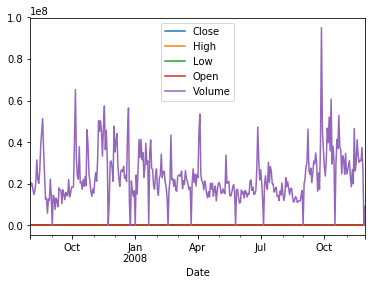

In [24]:
bb.plot()

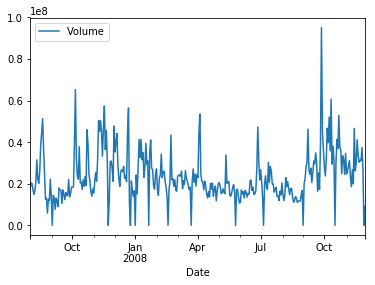

In [25]:
bb.plot(y="Volume")

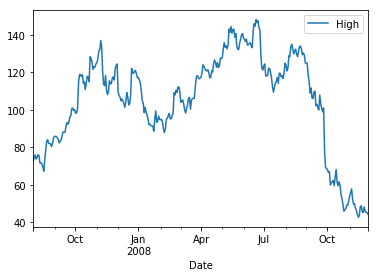

In [26]:
bb.plot(y="High")

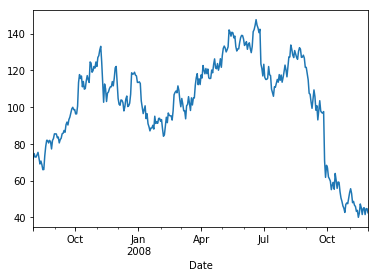

In [27]:
bb["Close"].plot()

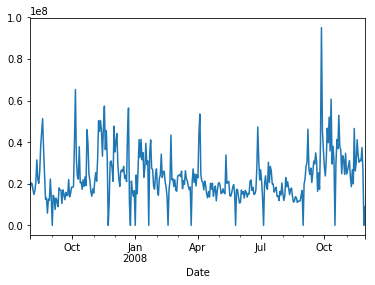

In [28]:
bb["Volume"].plot()

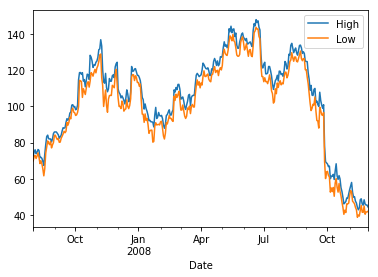

In [29]:
bb[["High","Low"]].plot()

<a id='2'></a>
## Modifying Aesthetics

In [30]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

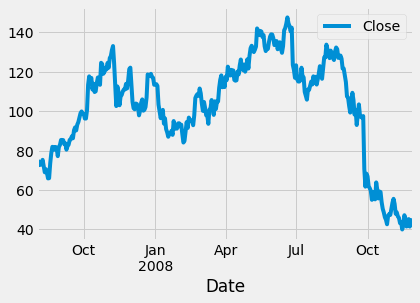

In [31]:
plt.style.use('fivethirtyeight')
bb.plot(y="Close")

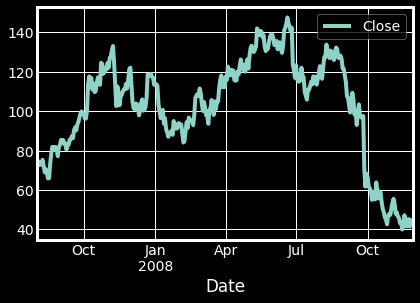

In [32]:
plt.style.use('dark_background')
bb.plot(y="Close")

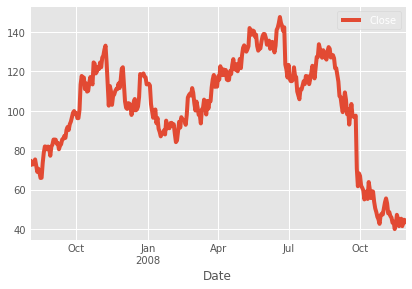

In [33]:
plt.style.use('ggplot')
bb.plot(y="Close")

<a id='3'></a>
## Bar Graph

In [34]:
company = "GOOG"
start = "2004-01-01"
end = "2016-12-31"
google = data.get_data_morningstar(company,start, end)
google.reset_index(inplace=True)
google.set_index(keys="Date")
google.set_index("Date", inplace=True)
google.drop(["Symbol"], axis=1, inplace=True) #delete columns
google.head()

,Close,High,Low,Open,Volume
Date,,,,,
2014-03-27,556.9312,566.4451,551.4064,566.4451,13087
2014-03-28,558.4570,564.8794,557.1406,559.7136,41115
2014-03-31,555.4453,565.4478,555.4054,565.3381,10801
2014-04-01,565.6074,566.8939,557.1805,557.1805,7953
2014-04-02,565.4478,603.1743,560.6510,579.1702,147099


In [35]:
google.describe()

,Close,High,Low,Open,Volume
count,722.000000,722.000000,722.000000,722.000000,7.220000e+02
mean,639.176857,644.418923,633.792125,639.457663,1.866513e+06
std,97.589945,98.152375,97.128635,97.550660,1.054566e+06
min,491.201600,494.618300,486.225300,493.295900,0.000000e+00
25%,541.835100,547.201800,538.579050,541.757900,1.304900e+06
50%,623.400000,629.350000,616.425000,623.695000,1.675160e+06
75%,736.087500,741.307500,730.040000,734.062500,2.144250e+06
max,813.110000,816.680000,805.140000,816.680000,1.116494e+07


In [36]:
def rank_performance(stock_price):
	if stock_price <= 500:
		return "Poor"
	elif stock_price > 500 and stock_price <= 600:
		return "Satisfactory"
	else:
		return "Stellar"

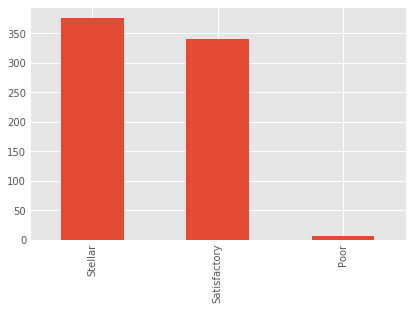

In [37]:
plt.style.use('ggplot')
google["Close"].apply(rank_performance).value_counts().plot(kind="bar")

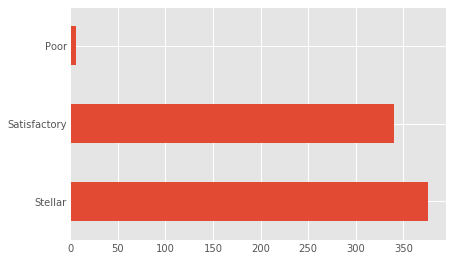

In [38]:
plt.style.use('ggplot')
google["Close"].apply(rank_performance).value_counts().plot(kind="barh")

<a id='4'></a>
## Pie Graph

In [39]:
company = "AAPL"
start = "2012-01-01"
end = "2016-12-31"
aapl = data.get_data_morningstar(company,start, end)
aapl.reset_index(inplace=True)
aapl.set_index(keys="Date")
aapl.set_index("Date", inplace=True)
aapl.drop(["Symbol"], axis=1, inplace=True) #delete columns
aapl.head()

,Close,High,Low,Open,Volume
Date,,,,,
2012-01-02,57.8571,57.8571,57.8571,57.8571,0
2012-01-03,58.7471,58.9286,58.4286,58.5000,75564699
2012-01-04,59.0629,59.2400,58.4686,58.6000,65061108
2012-01-05,59.7186,59.7929,58.9529,59.2786,67816805
2012-01-06,60.3429,60.3929,59.8886,59.9671,79596412


In [40]:
aapl["Close"].mean()

93.30895877394642

In [41]:
def rank_performance(stock_price):
	if stock_price >= 93.30895877394642:
		return "Above Average"
	else:
		return "Below Average"

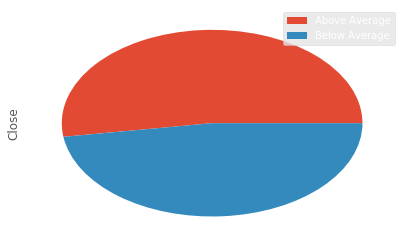

In [42]:
plt.style.use('ggplot')
aapl["Close"].apply(rank_performance).value_counts().plot(kind="pie", legend=True)

<a id='5'></a>
## Histogram

In [43]:
company = "GOOG"
start = "2004-01-01"
end = "2016-12-31"
google = data.get_data_morningstar(company,start, end)
google.reset_index(inplace=True)
google.set_index(keys="Date")
google.set_index("Date", inplace=True)
google.drop(["Symbol"], axis=1, inplace=True) #delete columns
google.head()

,Close,High,Low,Open,Volume
Date,,,,,
2014-03-27,556.9312,566.4451,551.4064,566.4451,13087
2014-03-28,558.4570,564.8794,557.1406,559.7136,41115
2014-03-31,555.4453,565.4478,555.4054,565.3381,10801
2014-04-01,565.6074,566.8939,557.1805,557.1805,7953
2014-04-02,565.4478,603.1743,560.6510,579.1702,147099


In [44]:
def custom_round(stock_price):
	return int(stock_price / 100.0) *100

In [45]:
google["High"].apply(custom_round).value_counts().sort_index()

400      1
500    339
600     89
700    281
800     12
Name: High, dtype: int64

In [46]:
google["High"].apply(custom_round).nunique()

5

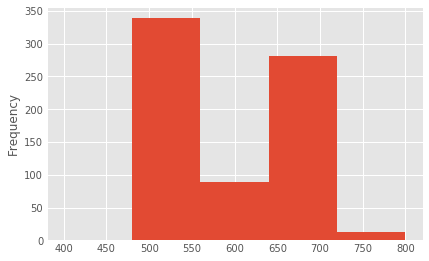

In [47]:
google["High"].apply(custom_round).plot(kind= "hist", bins=5)

<a id='6'></a>
## Scatter Plot

In [48]:
#data
x = np.arange(0,10)
y = x**2

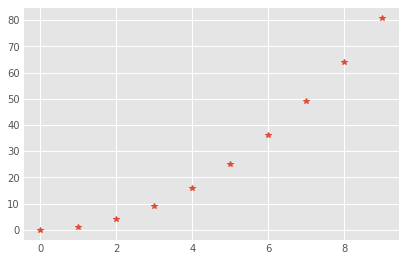

In [49]:
plt.plot(x,y, '*')

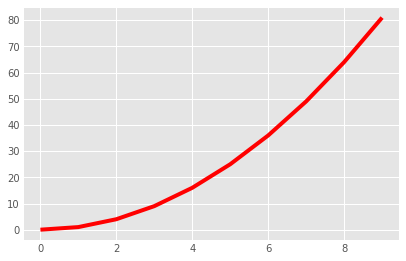

In [50]:
plt.plot(x,y, 'r')

Text(0,0.5,'ylabel')

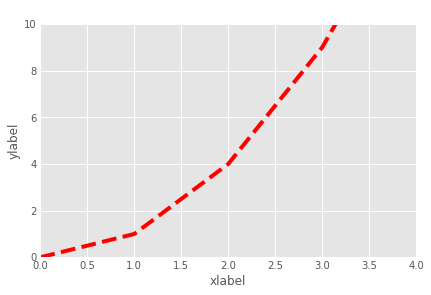

In [51]:
plt.plot(x,y, 'r--')
plt.xlim(0,4)
plt.ylim(0,10)
plt.title("TITLE")
plt.xlabel('xlabel')
plt.ylabel('ylabel')

In [52]:
mat = np.arange(0,100).reshape(10,10)

In [53]:
<a id='7'></a>
## Heat Map

SyntaxError: invalid syntax (<ipython-input-53-c84dba56316a>, line 1)

In [ ]:
plt.imshow(mat)
plt.colorbar()

In [ ]:
plt.imshow(mat, cmap='coolwarm')
plt.colorbar()

In [ ]:
<a id='8'></a>
## dataframe.plot()

In [ ]:
#df.plot(x='Salary', y='Age', kind='scatter')